In [27]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


Directly excape를 고려하는 경우는, outflow velocity가 0 일 때만 고려해서 다시 코드 짜보자

In [28]:
check = 0
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_rand_title = int(v_rand)
                v_rand_index = 1
            elif v_rand < 100 and v_rand > 15:
                D = int(v_rand * 10)
                v_rand_index = 1
            else:
                v_rand_title = int(v_rand)
                v_rand_index = 2
            for oo,expand_v in enumerate(expand_vel):
                if expand_v == 0:
                    expand_title = '000'
                    expand_index = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v/10)
                    expand_index= 3
                else :
                    expand_title = expand_v
                    expand_index = 2
                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                            emit_title = int(emit_v * 10)
                            emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp= f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec_com.dat'

                    path_sp_dat = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec.dat'

                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                        data_sp_dat = pd.read_csv(path_sp_dat, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        print(f"파일을 찾을 수 없습니다: {path_sp_dat}")
                        check += 1
                        continue

                    globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp_dat, sep='\s+', header=None)

                    globals()[f'lam_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
                    globals()[f'K_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][1]
                    globals()[f'H_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][2]
                    globals()[f'K_sct_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][3]
                    globals()[f'H_sct_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][4]

                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp, sep='\s+', header=None)
                    globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
                    globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][1]

                    globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][2] - globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][1]


                    # K and H line seperate
                    lam_c = (C_IV_K_A+C_IV_H_A)/2
                    #K line
                    globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    #H line
                    globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]

                


                    globals()[f'tot_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                    globals()[f'tot_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']



                    globals()[f'tot_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                    globals()[f'tot_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

print(check)

0


In [29]:
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]

In [30]:
check = 0
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_rand_title = int(v_rand)
                v_rand_index = 1
            elif v_rand < 100 and v_rand > 15:
                v_rand_title = int(v_rand * 10)
                v_rand_index = 1
            else:
                v_rand_title = int(v_rand)
                v_rand_index = 2
            for oo,expand_v in enumerate(expand_vel):
                if expand_v == 0:
                    expand_title = '000'
                    expand_index = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v/10)
                    expand_index= 3
                else :
                    expand_title = expand_v
                    expand_index = 2
                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                            emit_title = int(emit_v * 10)
                            emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp= f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec_com.dat'
                # 데이터 읽기
                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        check += 1
                        continue

                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp, sep='\s+', header=None)
                    globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
                    globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][3] - globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][2]


                    # K and H line seperate
                    lam_c = (C_IV_K_A+C_IV_H_A)/2
                    #K line
                    globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    #H line
                    globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] [globals()[f'sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]

                


                    globals()[f'halo_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                    globals()[f'halo_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']



                    globals()[f'halo_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                    globals()[f'halo_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']=  globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

print(check)

0


/tmp/ipykernel_5024/4113601948.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rs:" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(total_N_c, ratio_t[expand][:], 'rs:', marker='s', alpha=0.5)
/tmp/ipykernel_5024/4113601948.py:54: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "gs:" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(total_N_c, ratio_t[expand][:], 'gs:', marker='s', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
/tmp/ipykernel_5024/4113601948.py:66: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo:" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(total_N_c, ratio_t[expand][:], 'bo:', marker='s', alpha=1)
/tmp/ipykernel_5024/4113601948.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "mo:" (-> marke

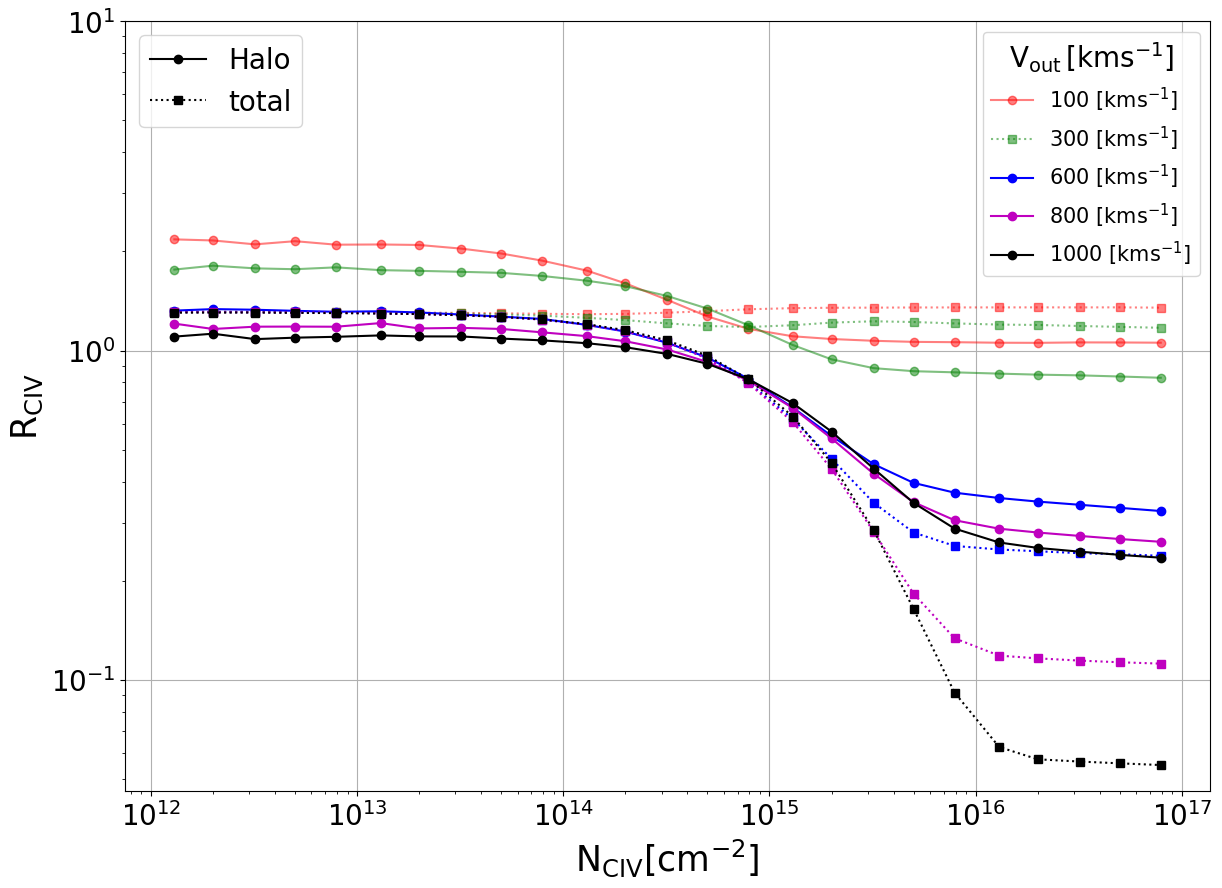

In [31]:

import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

vel_k= 118
emit = 500
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            a_1 = inf(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            a_2 = inf(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            ratio_h[ii][jj] = a_1/ a_2

            a_3 = inf(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            a_4 = inf(globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            ratio_t[ii][jj] = a_3/ a_4


fig = plt.figure(1,figsize=(14,10))

# from matplotlib.ticker import ScalarFormatter
# # for ii, jj in enumerate(ee):


# expand = 0
# plt.plot(total_N_c, ratio_h[expand][:], 'ro-',alpha=0.5,label=f'{expand} $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'r:', marker='s', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')

expand = 1
plt.plot(total_N_c, ratio_h[expand][:], 'ro-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'rs:', marker='s', alpha=0.5)


# expand = 2
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 's:', marker='s', alpha=0.5)


expand = 3
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'gs:', marker='s', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_h[expand][:], 'go-',alpha=0.5)


expand = 4
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'o:', marker='s', alpha=1)
# expand = 5
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'o:', marker='s', alpha=1)
expand = 6
plt.plot(total_N_c, ratio_h[expand][:], 'bo-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'bo:', marker='s', alpha=1)
# expand = 7
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'o:', marker='s', alpha=1)

expand = 8
plt.plot(total_N_c, ratio_h[expand][:], 'mo-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'mo:', marker='s', alpha=1)
# expand = 9
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'o:', marker='s', alpha=1)
expand = 10
plt.plot(total_N_c, ratio_h[expand][:], 'ko-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'k:', marker='s', alpha=1)

handles, labels = plt.gca().get_legend_handles_labels()
ff_t = plt.legend(handles[::], labels[::], title='$\mathrm{V}_\mathrm{out}\,[\mathrm{km s^{-1}}]$', title_fontsize=20, fontsize=15)



# Add the first legend back to the plot
plt.gca().add_artist(ff_t )

import matplotlib.lines as mlines
outflow_line = mlines.Line2D([], [], color='black', marker='o', label='Halo')
inflow_line = mlines.Line2D([], [], color='black', linestyle=':',marker='s', label='total')

# # Add a second legend
second_legend = plt.legend(handles=[outflow_line, inflow_line], loc='upper left', fontsize=20)



plt.xscale('log')
plt.xlabel(r'${\rm N}_{\rm C IV} [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'${\rm R}_{\rm C IV} $',fontsize=25)
plt.xticks(fontsize=20)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# plt.legend('-')
# plt.axhline(y=0.25,xmin=0,xmax=1,linestyle='--',color='k')
# plt.axhline(y=2.0,xmin=0,xmax=1,linestyle='--',color='k')

# plt.axhline(y=0.15,xmin=0,xmax=1,linestyle='--',color='k')
plt.grid(True)
plt.yscale('log')
plt.yticks([0.1, 1, 10], fontsize=20)

# plt.savefig(f'/home/jin/바탕화면/Ratio_total_halo_emit_{emit}.png',bbox_inches='tight')

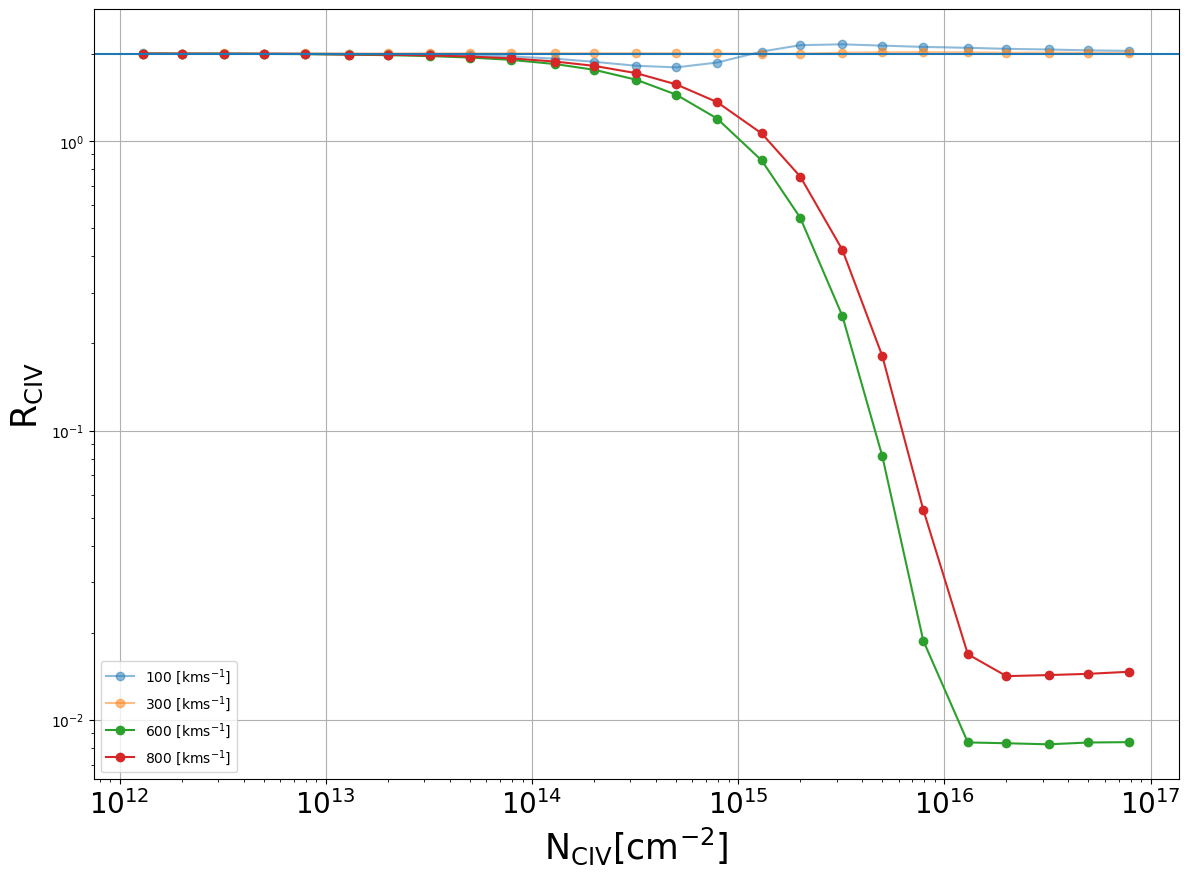

In [32]:

import math
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ
random_vel= [118,30,50,100,150]

expand = 0
# vel_k= 118
emit = 1
ratio_h = np.zeros((len(expand_vel),len(total_N_c)))
ratio_t = np.zeros((len(expand_vel),len(total_N_c)))

vel_k= 118
for ii,expand in enumerate(expand_vel):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            a_1 = inf(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            a_2 = inf(globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            ratio_h[ii][jj] = a_1/ a_2

            a_3 = inf(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            a_4 = inf(globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())
            ratio_t[ii][jj] = a_3/ a_4


fig = plt.figure(1,figsize=(14,10))

# from matplotlib.ticker import ScalarFormatter
# # for ii, jj in enumerate(ee):


vel_k= 118
# plt.plot(total_N_c, ratio_t[0][:], 'ro-',alpha=0.5,label=f'{vel_k} $[\\rm km s^{{-1}}]$')
# # plt.plot(total_N_c, ratio_t[0][:], 'r:', marker='s', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')

# vel_k= 30
# plt.plot(total_N_c, ratio_t[1][:], 'o-',alpha=0.5,label=f'{vel_k}$[\\rm km s^{{-1}}]$')
# # plt.plot(total_N_c, ratio_t[expand][:], 's:', marker='s', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')


# vel_k= 50
# plt.plot(total_N_c, ratio_t[2][:], 'o-',alpha=0.5,label=f'{vel_k} $[\\rm km s^{{-1}}]$')
# # plt.plot(total_N_c, ratio_t[expand][:], 's:', marker='s', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')


expand = 1
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'o-', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')


expand = 3
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
plt.plot(total_N_c, ratio_t[expand][:], 'o-', alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')


# expand = 4
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# expand = 5
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'o:', marker='s', alpha=1)
expand = 6
plt.plot(total_N_c, ratio_t[expand][:], 'o-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# expand = 7
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')

expand = 8
plt.plot(total_N_c, ratio_t[expand][:], 'o-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# expand = 9
# plt.plot(total_N_c, ratio_h[expand][:], 'o-',alpha=0.5,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'o:', marker='s', alpha=1)
# expand = 10
# # plt.plot(total_N_c, ratio_h[expand][:], 'ko-',alpha=1,label=f'{expand}00 $[\\rm km s^{{-1}}]$')
# plt.plot(total_N_c, ratio_t[expand][:], 'k:', marker='s', alpha=1)

# handles, labels = plt.gca().get_legend_handles_labels()
# ff_t = plt.legend(handles[::], labels[::], title='$\mathrm{V}_\mathrm{out}\,[\mathrm{km s^{-1}}]$', title_fontsize=20, fontsize=15)



# # Add the first legend back to the plot
# plt.gca().add_artist(ff_t )

# import matplotlib.lines as mlines
# outflow_line = mlines.Line2D([], [], color='black', marker='o', label='Halo')
# inflow_line = mlines.Line2D([], [], color='black', linestyle=':',marker='s', label='total')

# # # Add a second legend
# second_legend = plt.legend(handles=[outflow_line, inflow_line], loc='upper left', fontsize=20)


plt.legend()
plt.xscale('log')
plt.xlabel(r'${\rm N}_{\rm C IV} [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'${\rm R}_{\rm C IV} $',fontsize=25)
plt.xticks(fontsize=20)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# plt.legend('-')
# plt.axhline(y=0.25,xmin=0,xmax=1,linestyle='--',color='k')
plt.axhline(y=2.0,xmin=0,xmax=1)
plt.grid(True)
plt.yscale('log')
# plt.yticks([0.1, 1, 10], fontsize=20)

# plt.savefig('/home/jin/바탕화면/DelV_gauss_source_ratio_halo.pdf',bbox_inches='tight')

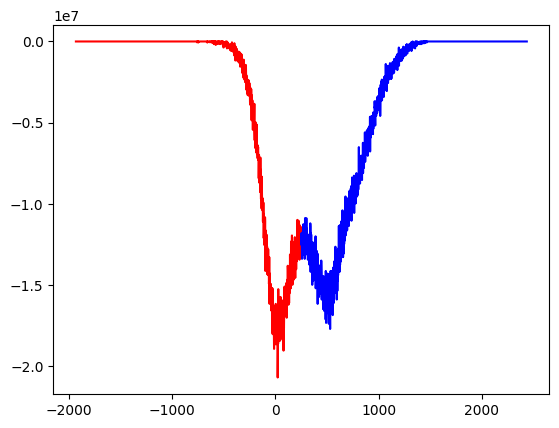

In [33]:
atom_n = 50
index = 13

vel_k = 118
emit = 200

expand = 1000
normal = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()


plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'r-',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'b-',markersize=2)

87.00289524417796
-119.99931934746246
123.44612890756326
202.1805540272728


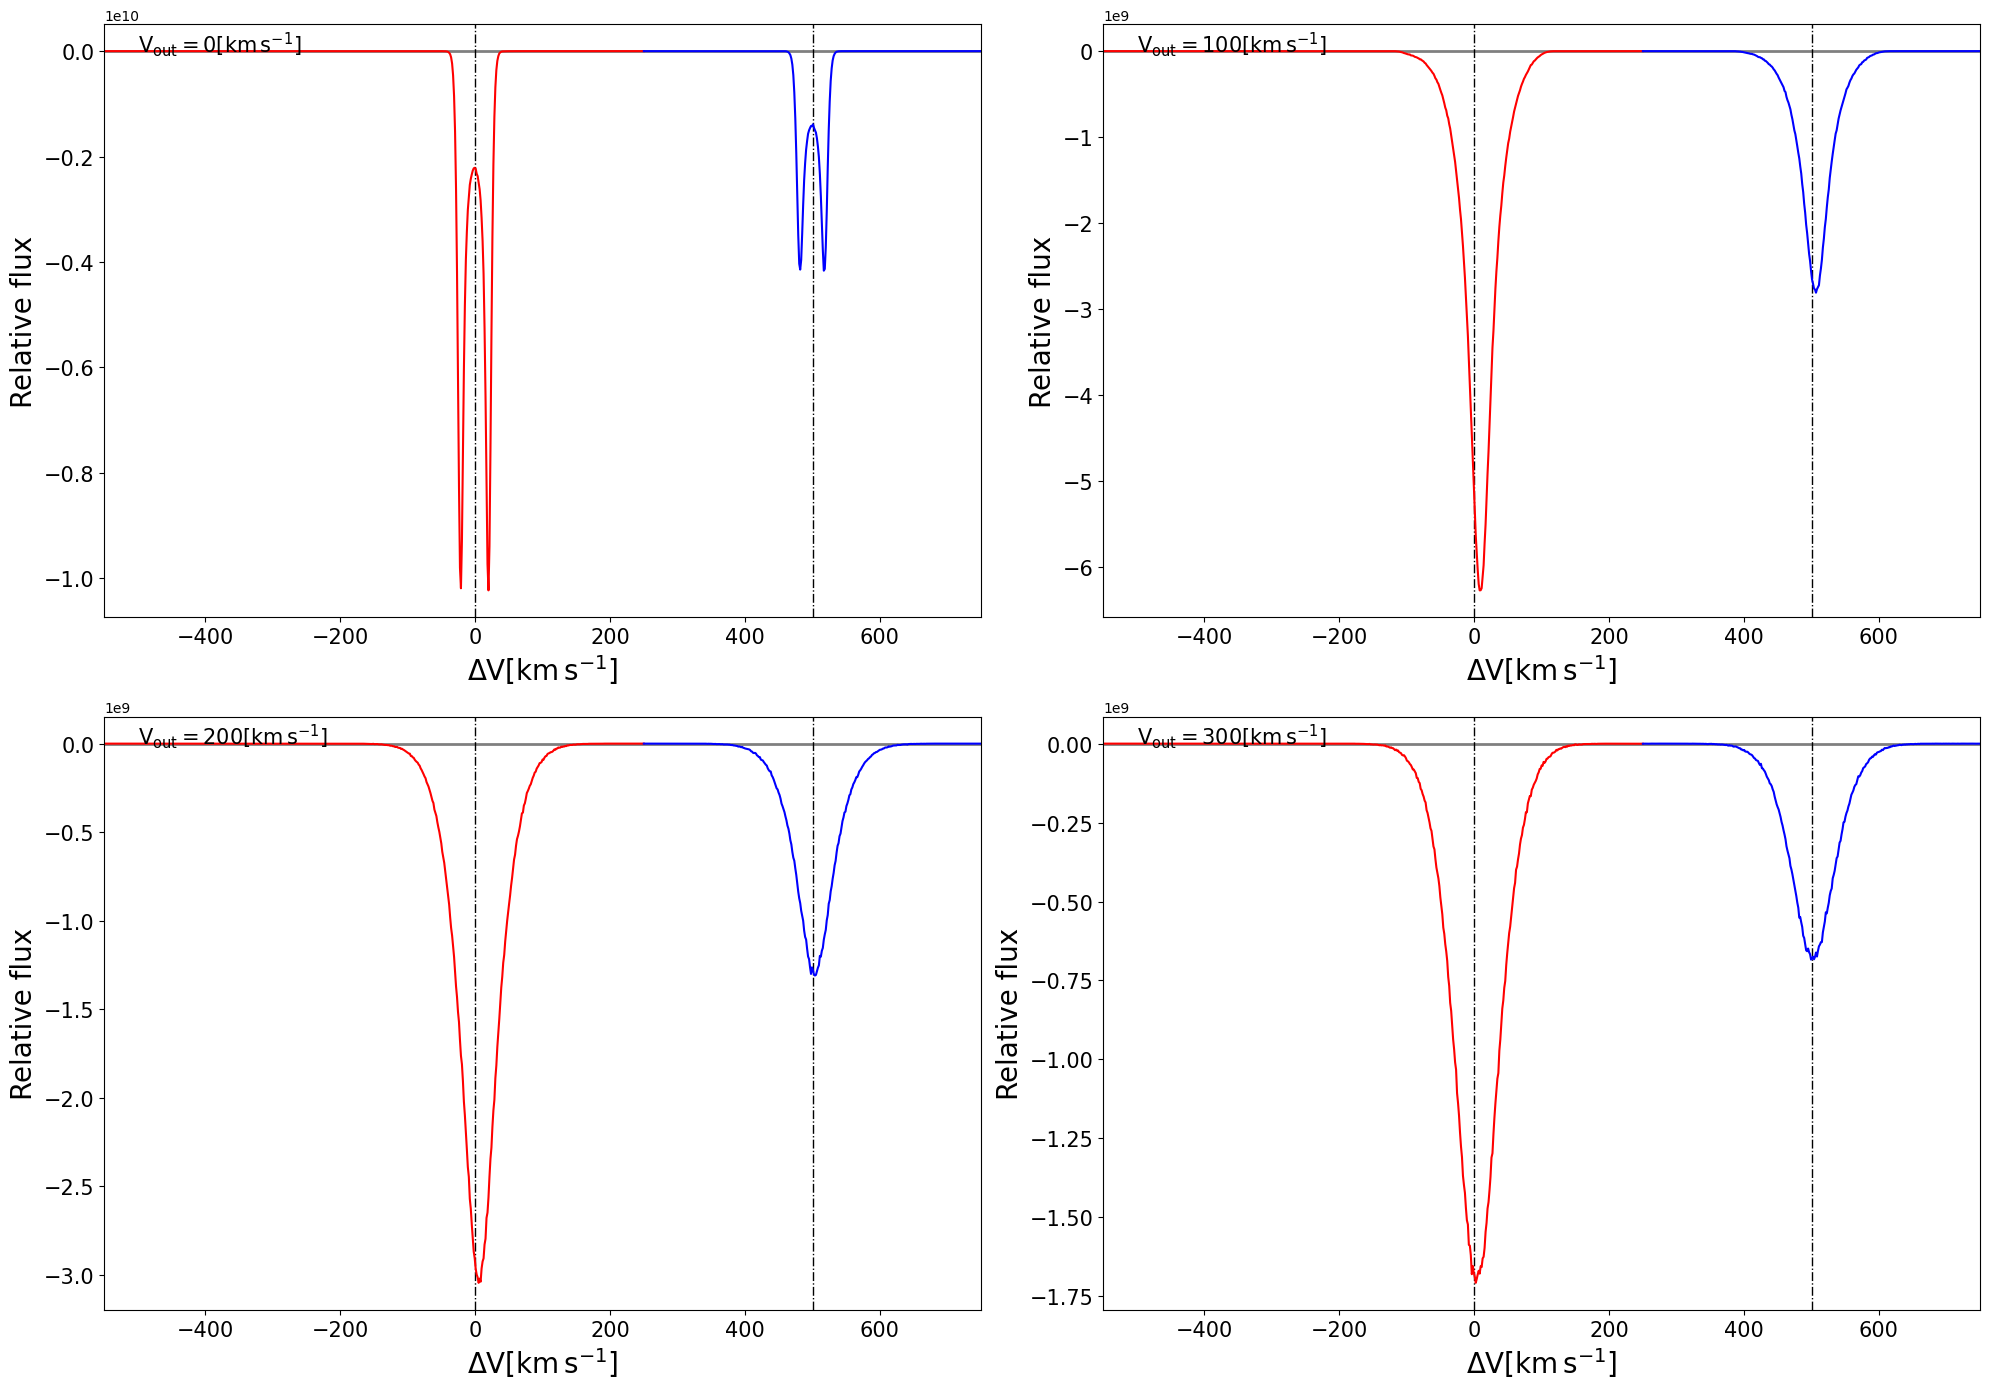

In [34]:
atom_n = 79
index = 14

vel_k = 118
emit = 50

expand = 0
normal = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
# normal = 1
fig = plt.figure(1,figsize=(20,14))

plt.subplot(221)

expand = 0
plt.axhline(y=0,xmin=0,xmax=1,linestyle='-',color='k',lw=2,alpha=0.5)
plt.axvline(x=0,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
plt.axvline(x=V_H,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)

plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'r-',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'b-',markersize=2)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize =20)
plt.ylabel('Relative flux',fontsize= 20)

# 조건을 만족하는 인덱스를 1차원 배열로 변환
indices = np.where(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] > 0)[0]

# 그 인덱스 중에서 halo_vy_K의 최대값의 인덱스를 찾음
tt = np.argmax(globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][indices])

# 찾은 인덱스를 이용해 조건에 맞는 vx 배열의 값을 출력
print(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][indices[tt]])

indices = np.where(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] < 0)[0]

# 그 인덱스 중에서 halo_vy_K의 최대값의 인덱스를 찾음
tt = np.argmax(globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][indices])

# 찾은 인덱스를 이용해 조건에 맞는 vx 배열의 값을 출력
print(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][indices[tt]])


# indices = np.where(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy() > V_H)[0]

# # 그 인덱스 중에서 halo_vy_K의 최대값의 인덱스를 찾음
# tt = np.argmax(globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy()[indices])

# # 찾은 인덱스를 이용해 조건에 맞는 vx 배열의 값을 출력
# print(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy()[indices[tt]])


# indices = np.where(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy() <V_H)[0]

# # 그 인덱스 중에서 halo_vy_K의 최대값의 인덱스를 찾음
# tt = np.argmax(globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy()[indices])

# # 찾은 인덱스를 이용해 조건에 맞는 vx 배열의 값을 출력
# print(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy()[tt])




plt.text(x=-500,y=globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal*0.8,size=15,fontweight='normal',s=f'$ \\rm V_{{\\rm out}}= {expand} [\\rm km \\, s^{{-1}}]$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-550,750)

plt.tight_layout()


plt.subplot(222)

expand = 100
plt.axhline(y=0,xmin=0,xmax=1,linestyle='-',color='k',lw=2,alpha=0.5)
plt.axvline(x=0,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
plt.axvline(x=V_H,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
print(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][np.argmax(globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])])
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'r-',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'b-',markersize=2)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize =20)
plt.ylabel('Relative flux',fontsize= 20)
plt.text(x=-500,y=globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal*0.8,s=f'$ \\rm V_{{\\rm out}}= {expand} [\\rm km \\, s^{{-1}}]$',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-550,750)

plt.tight_layout()

plt.subplot(223)
expand = 200
plt.axhline(y=0,xmin=0,xmax=1,linestyle='-',color='k',lw=2,alpha=0.5)
plt.axvline(x=0,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
plt.axvline(x=V_H,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
print(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'][np.argmax(globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])])
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'r-',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'b-',markersize=2)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize = 20)
plt.ylabel('Relative flux',fontsize =20)
plt.text(x=-500,y=globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal*0.8,s=f'$ \\rm V_{{\\rm out}}= {expand} [\\rm km \\, s^{{-1}}]$',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-550,750)
plt.tight_layout()

plt.subplot(224)
expand = 300
plt.axhline(y=0,xmin=0,xmax=1,linestyle='-',color='k',lw=2,alpha=0.5)
plt.axvline(x=0,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
plt.axvline(x=V_H,ymin=0,ymax=2,linestyle = 'dashdot',color='k',lw=1)
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'r-',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal ,'b-',markersize=2)
plt.xlabel(r'$\Delta \rm V [\rm km \, s^{-1}]$',fontsize = 20)
plt.ylabel('Relative flux',fontsize =20)
plt.text(x=-500,y=globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal*0.8,s=f'$ \\rm V_{{\\rm out}}= {expand} [\\rm km \\, s^{{-1}}]$',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-550,750)
plt.tight_layout()



In [35]:
atom_n = 79
index = 14

vel_k = 118
emit = 50

def area(xx,yy):
    dx = abs(xx[1] - xx[0])
    yy_norm = yy
    area = np.sum(yy_norm,0)
    return area*dx
expand = 100
aa = area(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())

expand = 200
bb = area(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())

expand = 300
cc = area(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())

print(aa , bb , aa/cc)

expand = 100
aa = area(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())

expand = 200
bb = area(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())

expand = 300
cc = area(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy(),globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].to_numpy())

print(aa , bb , aa/bb)


-1738526.6756855785 -1079208.5883815926 2.6902815916183154
-3633835.945618678 -2520458.0935060703 1.4417363077692948


(-250.0, 750.0)

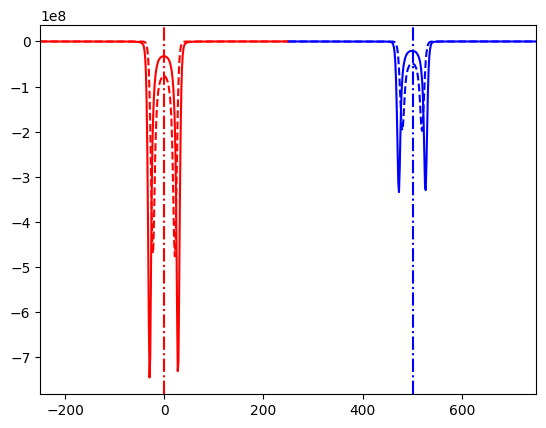

In [36]:
vel_k= 118
emit = 50
atom_n = 13
index= 16
expand = 0
normal=globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
expand = 0
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'r-',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'b-',markersize=2)

index =  15
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'r--',markersize=2)
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'b--',markersize=2)
# atom_n = 50
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'r')
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'b')

# atom_n = 79
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'r')
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'b')

def gauss(x,x_0,v_0):
    top = (x-x_0)**2 / v_0**2 
    a= np.exp(-top/2) 
    sol = a / a.max()
    return sol 
# y_H = gauss(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H,11.8)
# fc_H = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal.max()

# y_K = gauss(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K,11.8)
# fc_K = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal.max()

# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], y_H*fc_H)
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], y_K*fc_K)


# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'r')
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal,'b')


plt.axvline(x=0,ymin=0,ymax=2,linestyle='dashdot',color='r')
plt.axvline(x=V_H ,ymin=0,ymax=2,linestyle='dashdot',color='b')
plt.xlim(-250,750)

In [37]:
def lam_change(x,v):
    x_new_1 = x*(1+v/cc_k)
    x_new_2 = x*(1+2*v/cc_k)
    dx_1 = x_new_1 - x 
    dx_2 = x_new_2 - x
    dev_0 = (x/C_IV_K_A -1 ) * cc_k
    del_v_1 = (x_new_1/C_IV_K_A -1 )* cc_k
    del_v_2 = (x_new_2/C_IV_K_A -1 )* cc_k
    return dx_1,dx_2, del_v_1, del_v_2

x = C_IV_K_A
v = 100 

l1,l2,d1,d2 = lam_change(x,v)
print(d1,d2,l1,l2)

100.00000000002834 199.9999999999901 0.5164195958527671 1.0328391917050794


In [38]:
def ratio(x_1,y_1,x_2,y_2):
    delx_1 = x_1[1]- x_1[0]
    total_1 = np.sum(y_1*delx_1,axis=0)
    delx_2 = x_2[1]- x_2[0]
    total_2 = np.sum(y_2*delx_2,axis=0)
    ratio = total_1 / total_2
    return ratio

def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0



NN = 10000
x = np.linspace(1530,1570,NN)
sigma_tt = np.arange(10,610,10)
C_IV_K = 1548.187 # cm
C_IV_H = 1550.772  # cm
R_c_tt = np.zeros(len(sigma_tt)) 
lam_c = (C_IV_H +C_IV_K) / 2
for ii, sig in (enumerate(sigma_tt)):
    ff,f0 = function(sig,x,C_IV_K,C_IV_H)
    xx_k = x[x<=lam_c]
    xx_h = x[x>lam_c]   
    ff_k = ff[x<=lam_c]
    ff_h = ff[x>lam_c] 
    dlam = x[1]-x[0]
    flux_k = np.sum(ff_k*dlam,axis=0)
    flux_h = np.sum(ff_h*dlam,axis=0)
    R_c_tt[ii] = flux_k/ flux_h


NN = 10000
x = np.linspace(1530,1570,NN)

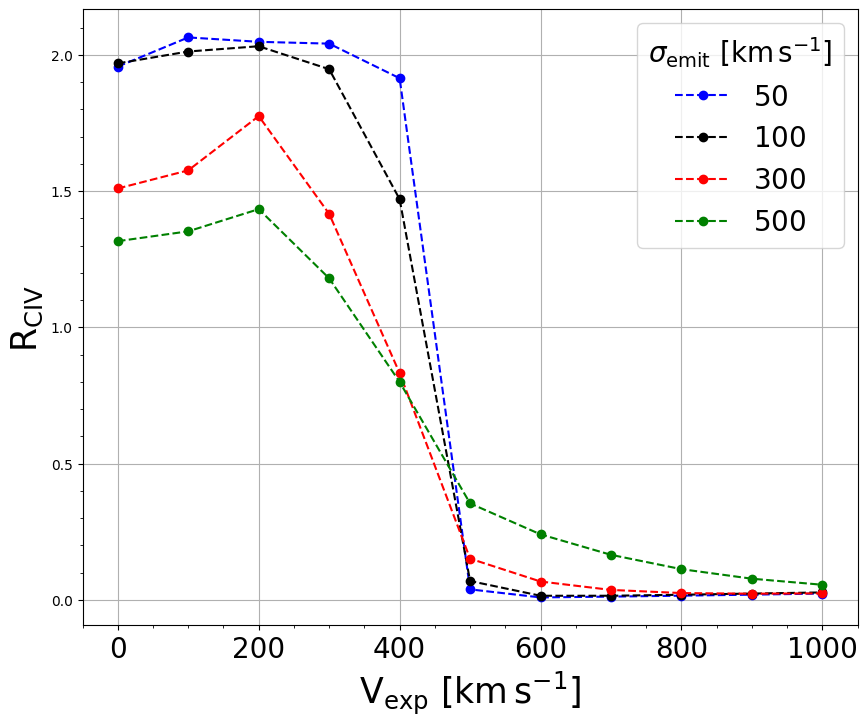

In [39]:
fig = plt.figure(1,figsize=(10,8))
atom_n, index= 50, 16
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/PPT_various_emit_index_16_tot.png',bbox_inches='tight')

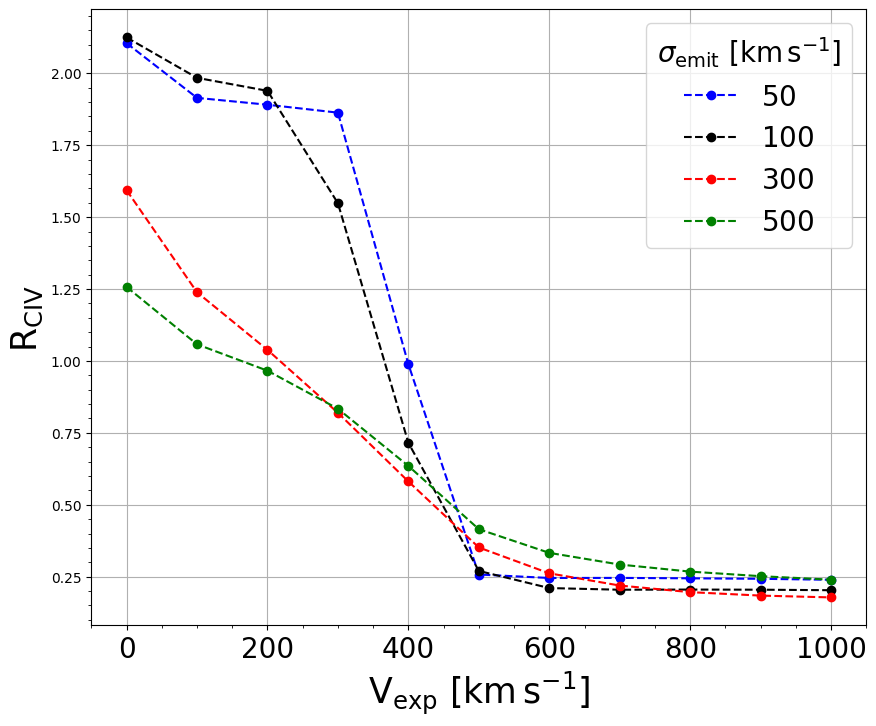

In [40]:
fig = plt.figure(1,figsize=(10,8))
atom_n, index= 50, 16
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/PPT_various_emit_index_16_halo.png',bbox_inches='tight')

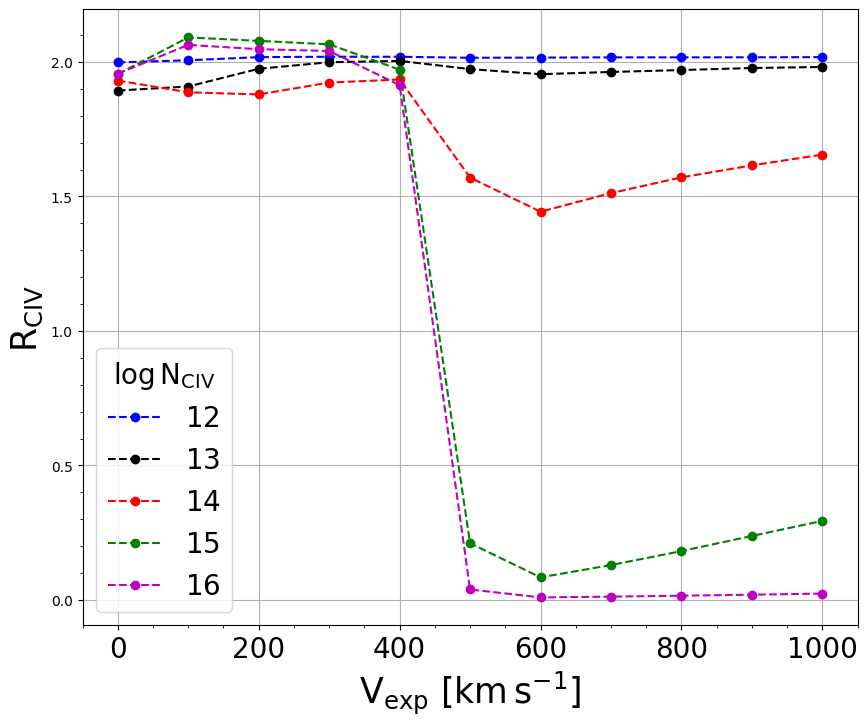

In [41]:
fig = plt.figure(1,figsize=(10,8))
atom_n, index= 50, 12
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${index} $')

index = 13
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${index} $')


index = 14
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${index} $')


index = 15
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${index} $')



index = 16
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'mo--', label=f'${index} $')


# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\log {{\\rm N_{{\\rm CIV}}}}  $',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)


# plt.savefig(r'/home/jin/바탕화면/PPT_various_column_emit_50_index_tot.png',bbox_inches='tight')

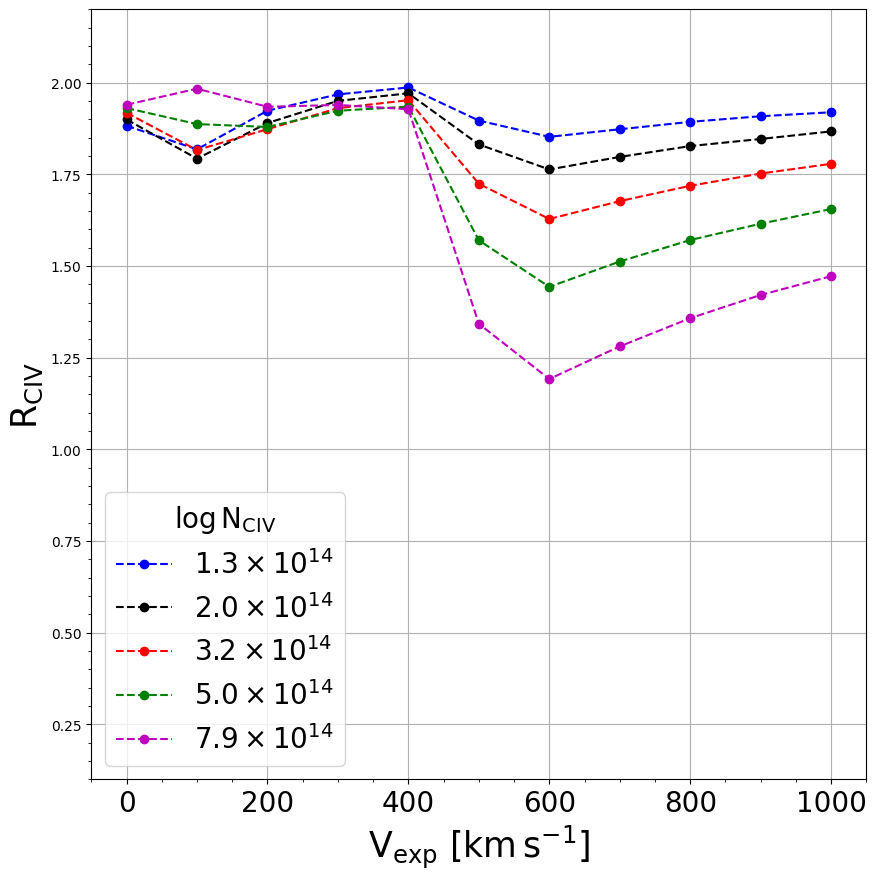

In [42]:
fig = plt.figure(1,figsize=(10,10))
atom_n, index= 50, 14
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))
index = 14
atom_n = 13
for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'$ {atom_n/10} \\times 10^{{{index}}} $')

index = 14
atom_n = 20
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'$ {atom_n/10} \\times 10^{{{index}}} $')

index = 14
atom_n = 32
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'$ {atom_n/10} \\times 10^{{{index}}} $')


index = 14
atom_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'$ {atom_n/10} \\times 10^{{{index}}}$')



index = 14
atom_n = 79
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'mo--', label=f'$ {atom_n/10} \\times 10^{{{index}}} $')


# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\log {{\\rm N_{{\\rm CIV}}}}  $',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.ylim(0.1,2.2)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)


# plt.savefig(r'/home/jin/바탕화면/PPT_various_column_emit_50_index_14.png',bbox_inches='tight')

(array([-80000., -70000., -60000., -50000., -40000., -30000., -20000.,
        -10000.,      0.,  10000.]),
 [Text(0, -80000.0, '−80000'),
  Text(0, -70000.0, '−70000'),
  Text(0, -60000.0, '−60000'),
  Text(0, -50000.0, '−50000'),
  Text(0, -40000.0, '−40000'),
  Text(0, -30000.0, '−30000'),
  Text(0, -20000.0, '−20000'),
  Text(0, -10000.0, '−10000'),
  Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000')])

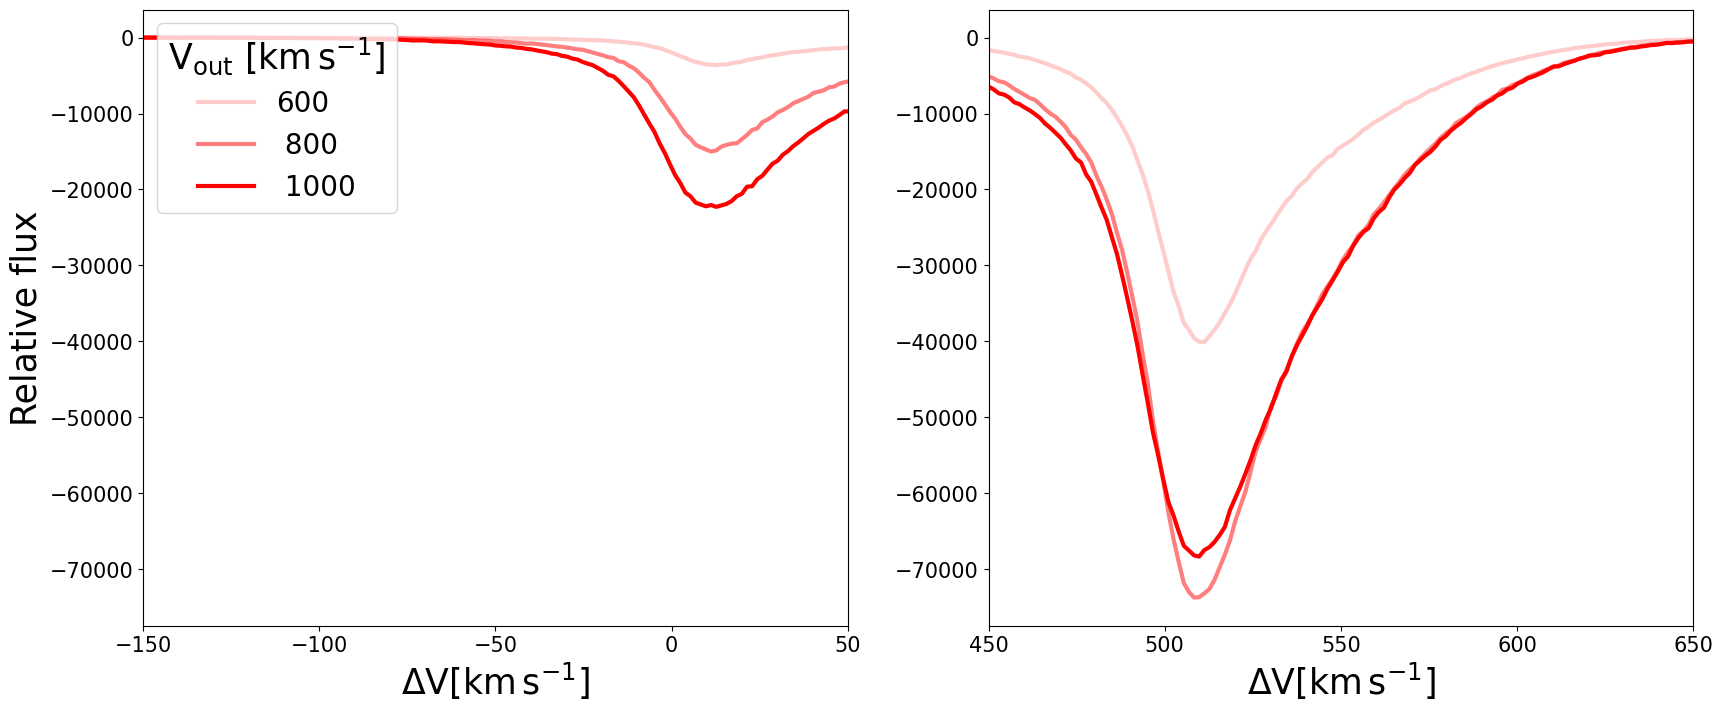

In [43]:
fig = plt.figure(1 ,figsize=(20,8))

atom_n, index= 50, 15
v_rand = 118
emit_n = 50


# expand = 400
first_label = True

# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],'r')
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'])

plt.subplot(121)
expand = 600
first_label = True
normal_f = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3, label = r'{}'.format(expand))
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)


expand = 800
first_label = True
normal_f = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3, label = r' {}'.format(expand))
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)

expand = 1000
first_label = True
normal_f = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',lw=3, label = r' {}'.format(expand))
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'r',lw=3)

plt.xlim(-150,50)
plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative flux',fontsize=25)
plt.xticks([-150,-100,-50,0,50],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20 , title = r'$\rm V_{\rm out} ~ [\rm km\,s^{-1}]$',title_fontsize= 25,loc='upper left')


plt.subplot(122)
expand = 600
first_label = True
normal_f = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)


expand = 800
first_label = True
normal_f = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)

expand = 1000
first_label = True
normal_f = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',lw=3)
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'r',lw=3)

plt.xlim(450,650)

plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
# plt.ylabel(r'Relative flux',fontsize=25)
plt.xticks([450,500,550,600,650],fontsize=15)
plt.yticks(fontsize=15)
# plt.text(570,8,r'$\log{N_{CIV}} = 15 $',size= 30)


# plt.savefig(r'/home/jin/바탕화면/PPT_various_out_emit_50_index_15_tot_version_2.png',bbox_inches='tight')

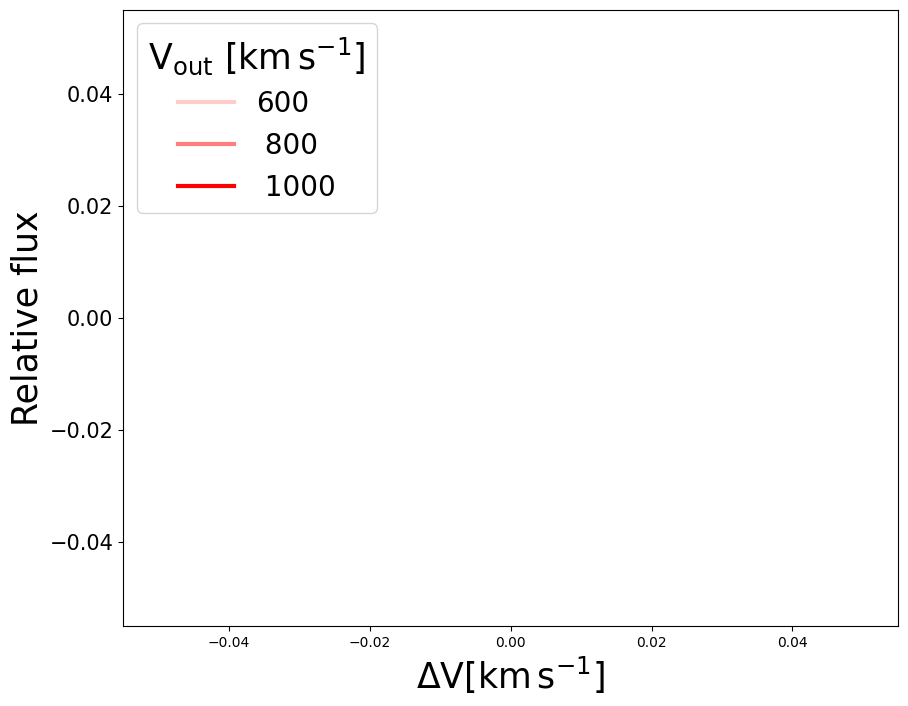

In [44]:
fig = plt.figure(1 ,figsize=(10,8))

atom_n, index= 50, 15
v_rand = 118
emit_n = 50


# expand = 400
first_label = True

# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],'r')
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'])

# plt.subplot(121)
expand = 600
first_label = True
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3, label = r'{}'.format(expand))
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)


expand = 800
first_label = True

plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3, label = r' {}'.format(expand))
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)

expand = 1000
first_label = True

plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',lw=3, label = r' {}'.format(expand))
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'r',lw=3)

# plt.xlim(-150,50)
plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative flux',fontsize=25)
# plt.xticks([-150,-100,-50,0,50],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20 , title = r'$\rm V_{\rm out} ~ [\rm km\,s^{-1}]$',title_fontsize= 25,loc='upper left')


# plt.subplot(122)
# expand = 600
# first_label = True
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)


# expand = 800
# first_label = True

# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)

# expand = 1000
# first_label = True

# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',lw=3)
# plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'r',lw=3)

# plt.xlim(450,650)

# plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
# # plt.ylabel(r'Relative flux',fontsize=25)
# plt.xticks([450,500,550,600,650],fontsize=15)
# plt.yticks(fontsize=15)
# plt.text(570,8,r'$\log{N_{CIV}} = 15 $',size= 30)


# plt.savefig(r'/home/jin/바탕화면/PPT_various_out_emit_50_index_15_tot.png',bbox_inches='tight')

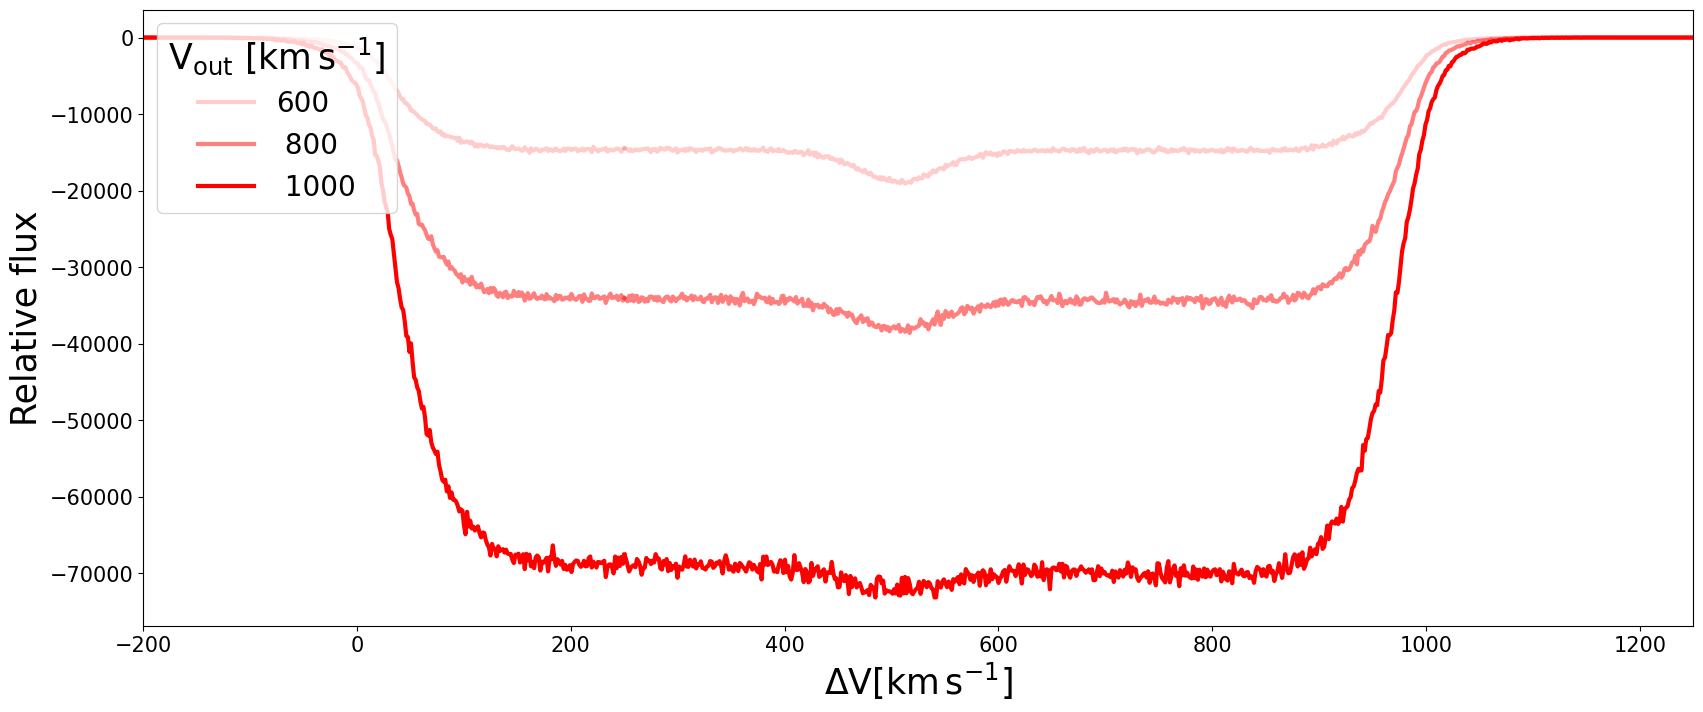

In [45]:
fig = plt.figure(1 ,figsize=(20,8))

atom_n, index= 50, 15
v_rand = 118
emit_n = 50


# expand = 400
first_label = True

# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],'r')
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'])

# plt.subplot(121)
expand = 600
first_label = True
normal_f = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3, label = r'{}'.format(expand))
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)


expand = 800
first_label = True
normal_f = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3, label = r' {}'.format(expand))
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)

expand = 1000
first_label = True
normal_f = globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',lw=3, label = r' {}'.format(expand))
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'r',lw=3)

plt.xlim(-200,1250)
plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative flux',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20 , title = r'$\rm V_{\rm out} ~ [\rm km\,s^{-1}]$',title_fontsize= 25,loc='upper left')


# plt.subplot(122)
# expand = 600
# first_label = True
# normal_f = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.2,lw=3)


# expand = 800
# first_label = True

# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',alpha=0.5,lw=3)

# expand = 1000
# first_label = True

# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r',lw=3)
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'r',lw=3)

# plt.xlim(250,1050)

# plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
# # plt.ylabel(r'Relative flux',fontsize=25)
# plt.xticks([450,500,550,600,650],fontsize=15)
# plt.yticks(fontsize=15)
# # plt.text(570,8,r'$\log{N_{CIV}} = 15 $',size= 30)


plt.savefig(r'/home/jin/바탕화면/PPT_various_out_emit_50_index_15_halo_scat.png',bbox_inches='tight')

Text(800, 1.1, '$\\log{N_{CIV}} = 15 $')

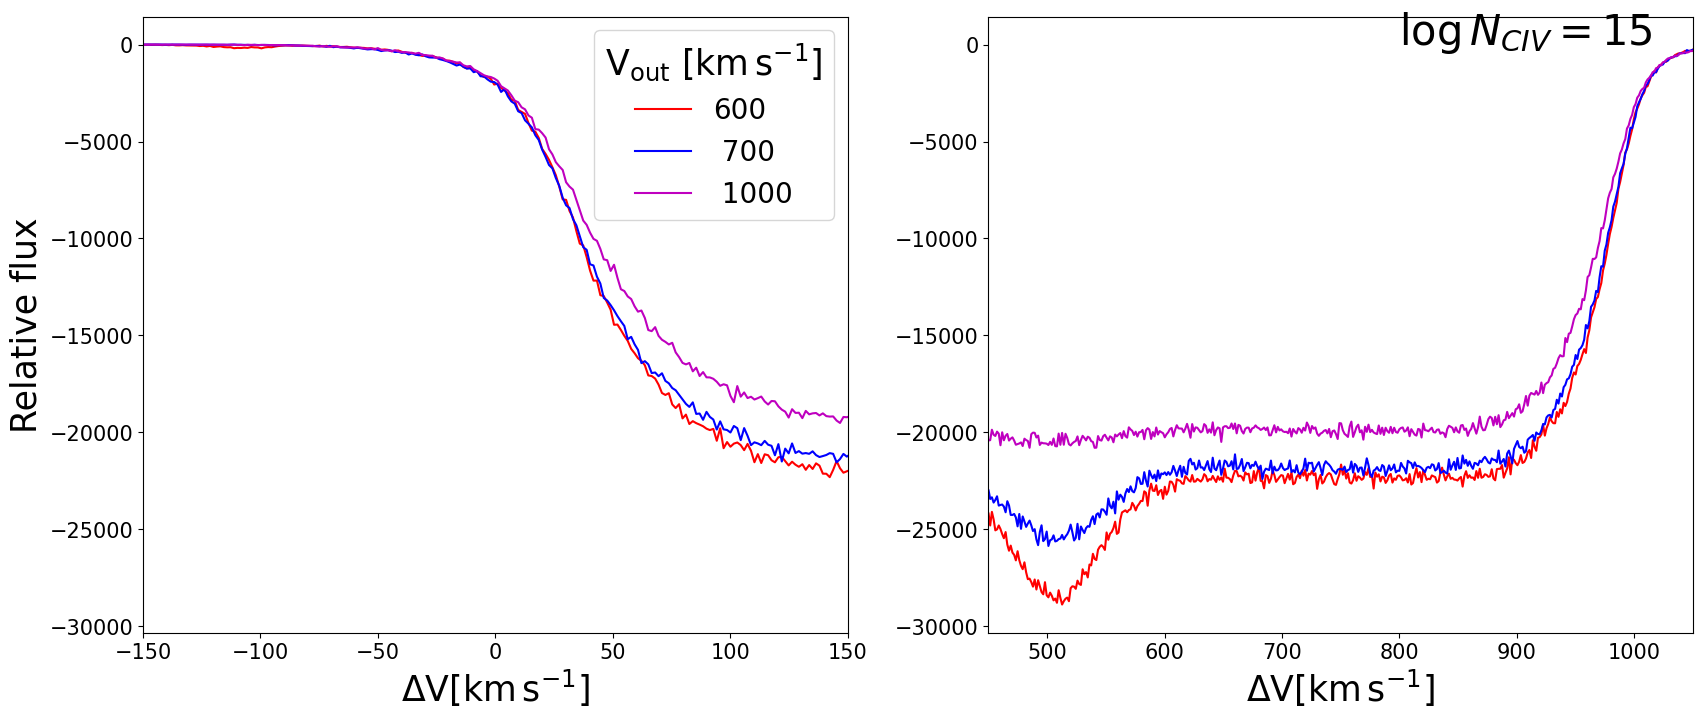

In [46]:
fig = plt.figure(1 ,figsize=(20,8))

atom_n, index= 50, 15
v_rand = 118
emit_n = 50


# expand = 400
first_label = True

# plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],'r')
# plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'])

plt.subplot(121)
expand = 600
first_label = True
normal_f = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r', label = r'{}'.format(expand))
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r')


expand = 700
first_label = True

plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'b', label = r' {}'.format(expand))
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'b')

expand = 1000
first_label = True

plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'m', label = r' {}'.format(expand))
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'m')

plt.xlim(-150,150)
plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative flux',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20 , title = r'$\rm V_{\rm out} ~ [\rm km\,s^{-1}]$',title_fontsize= 25)

plt.subplot(122)
expand = 600
first_label = True
normal_f = globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].max()
plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r')
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'r')


expand = 700
first_label = True

plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'b')
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'b')

expand = 1000
first_label = True

plt.plot(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f,'m')
plt.plot(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'] / normal_f ,'m')

plt.xlim(450,1050)

plt.xlabel(r'$\Delta \rm V  [\rm km\, s^{-1}]$',fontsize=25)
# plt.ylabel(r'Relative flux',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(800,1.1,r'$\log{N_{CIV}} = 15 $',size= 30)
# plt.savefig(r'/home/jin/바탕화면/PPT_various_out_emit_50_index_15_halo.png',bbox_inches='tight')

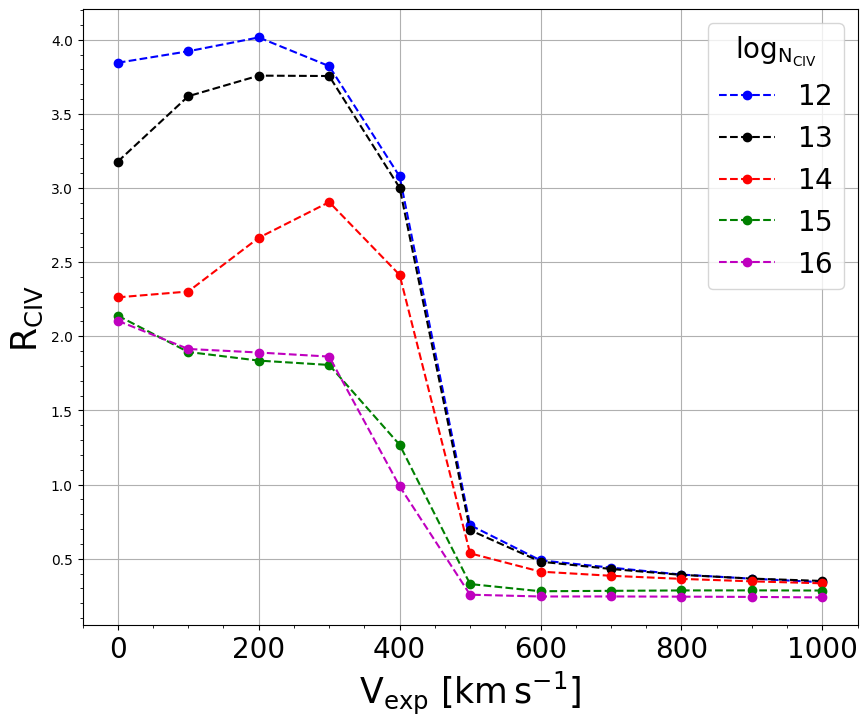

In [47]:
fig = plt.figure(1,figsize=(10,8))
atom_n, index= 50, 12
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${index} $')

index = 13
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${index} $')


index = 14
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${index} $')


index = 15
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${index} $')



index = 16
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'mo--', label=f'${index} $')


# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\log_{{\\rm N_{{\\rm CIV}}}}  $',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/PPT_various_index_vel_emit_50_halo.png',bbox_inches='tight')

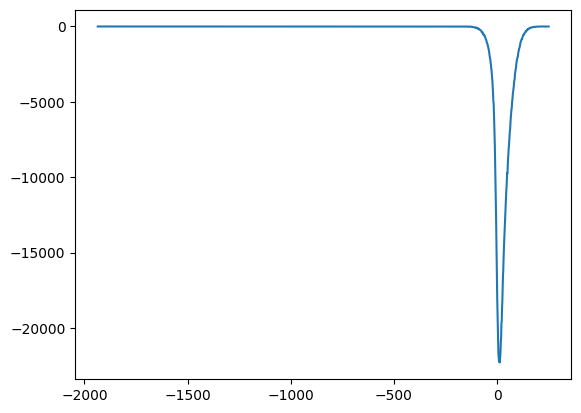

In [48]:

atom_n, index= 50, 15
v_rand = 118


emit_n = 50
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'],globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'])

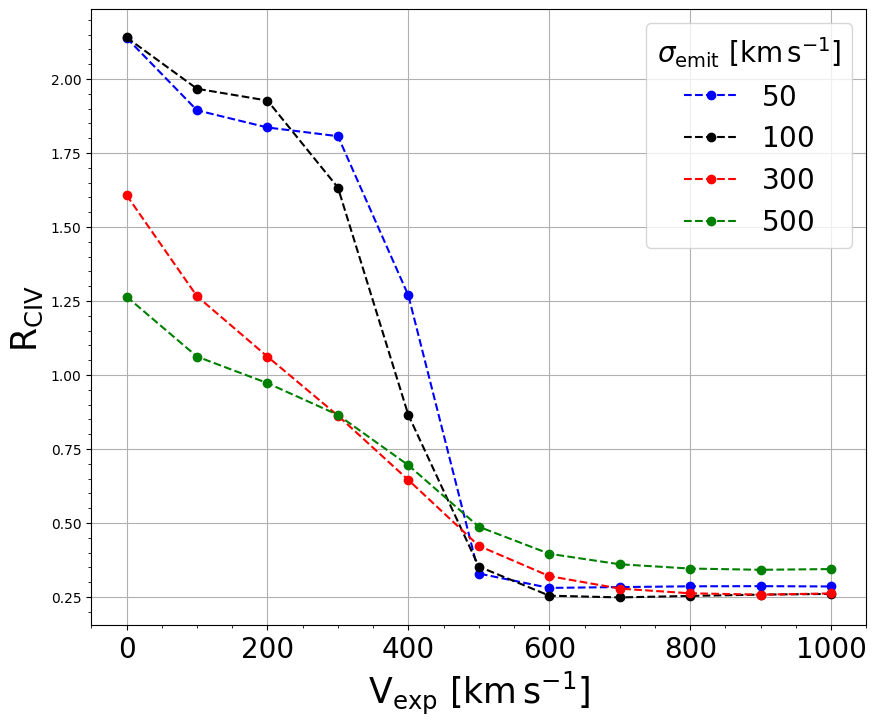

In [49]:
fig = plt.figure(1,figsize=(10,8))
atom_n, index= 50, 15
v_rand = 118


emit_n = 50
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'bo--', label=f'${emit_n} $')

emit_n = 100
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ko--', label=f'${emit_n} $')


emit_n = 300
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'ro--', label=f'${emit_n} $')


emit_n = 500
first_label = True

Ratio = np.zeros(len(expand_vel))

for ii, expand in enumerate(expand_vel):
    try:
        R_C = ratio(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(expand_vel, Ratio, 'go--', label=f'${emit_n} $')

# $\\rm V_{{\\rm exp}} = {expand}00 km \, s^{{{-1}}}$
plt.legend(fontsize=20,title=f'$\\sigma_{{\\rm emit}} ~ [\\rm km \\, s^{{-1}}]$',title_fontsize=20)
# plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\rm V_{\rm exp} ~[\rm km\, s^{-1}]$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
# plt.savefig(r'/home/jin/바탕화면/N_CIV_15_to_expandv_emit.pdf',bbox_inches='tight')

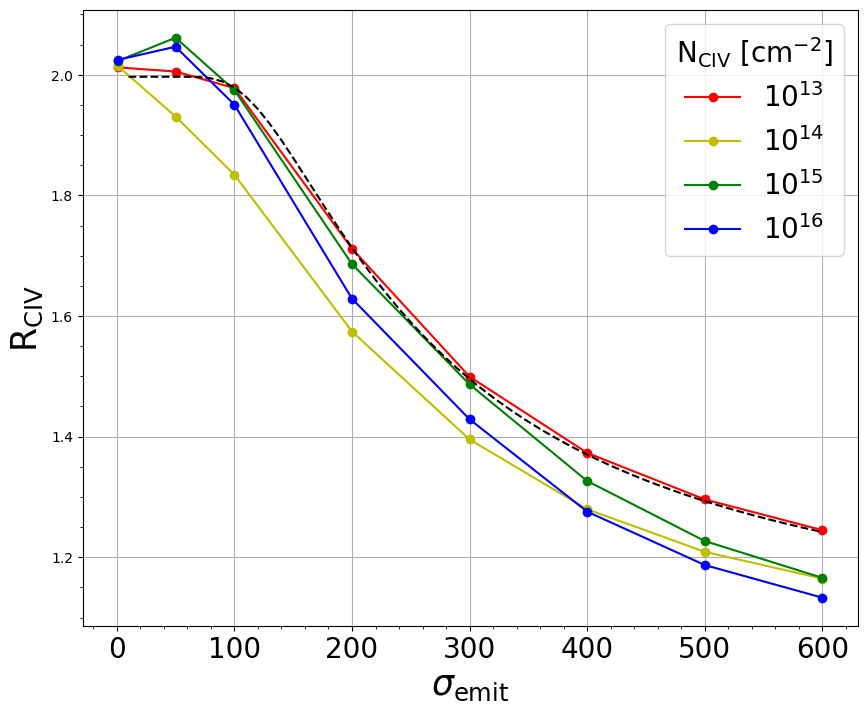

In [50]:
fig = plt.figure(1,figsize=(10,8))
atom_n, expand = 32, 300
v_rand = 118
emit = np.arange(100,700,100)
emit = np.append([1,50],emit)
# 첫 번째 조합: index = 13
index = 13
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'ro-', label=f'$10^{{{index}}}$')

index = 14
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'yo-', label=f'$10^{{{index}}}$')

index = 15
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'go-', label=f'$10^{{{index}}}$')

index = 16
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'tot_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'tot_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'bo-', label=f'$10^{{{index}}}$')

plt.legend(fontsize=20,title=f'$\\rm N_{{\\rm CIV}} ~[\\rm cm^{{-2}}]$',title_fontsize=20)
plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\sigma_{\rm emit}$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
plt.minorticks_on()

# plt.savefig(r'/home/jin/바탕화면/Vexp_400_N_CIV_emit.pdf',bbox_inches='tight')

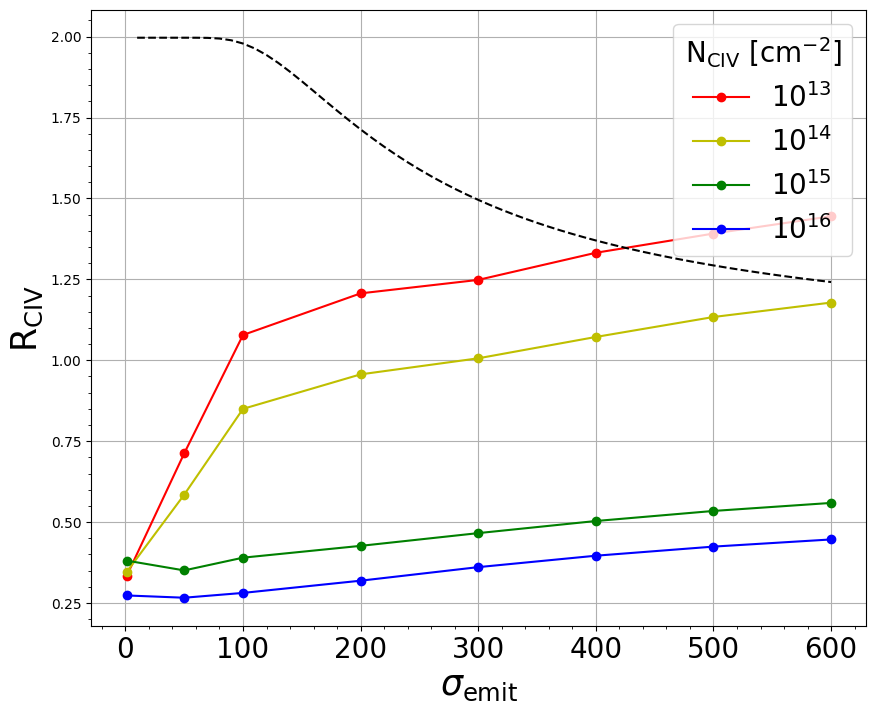

In [51]:
fig = plt.figure(1,figsize=(10,8))
atom_n, expand = 32, 500
v_rand = 118
emit = np.arange(100,700,100)
emit = np.append([1,50],emit)
# 첫 번째 조합: index = 13
index = 13
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'ro-', label=f'$10^{{{index}}}$')

index = 14
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'yo-', label=f'$10^{{{index}}}$')

index = 15
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'go-', label=f'$10^{{{index}}}$')

index = 16
first_label = True
Ratio = np.zeros(len(emit))
for ii, emit_n in enumerate(emit):
    try:
        R_C = ratio(globals()[f'halo_x_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_K_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_x_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy(),
                    globals()[f'halo_y_H_{atom_n}_{index}_{expand}_{v_rand}_{emit_n}'].to_numpy())
        Ratio[ii] = R_C
    except KeyError as e:
        print(f"Variable not found: {e}")
        Ratio[ii] = np.nan  # 변수가 없을 경우 NaN 값 대입 (또는 다른 값으로 대체 가능)
        
plt.plot(emit, Ratio, 'bo-', label=f'$10^{{{index}}}$')

plt.legend(fontsize=20,title=f'$\\rm N_{{\\rm CIV}} ~[\\rm cm^{{-2}}]$',title_fontsize=20)
plt.plot(sigma_tt,R_c_tt,'k--')
# plt.ylim(0,2+0.3)
plt.xlabel(r'$\sigma_{\rm emit}$',fontsize=25)
plt.ylabel(r'$\rm R_{\rm CIV}$',fontsize=25)
# plt.yticks([0.0,0.5,1.0,1.5,2.0],fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True)
plt.minorticks_on()

# plt.savefig(r'/home/jin/바탕화면/Vexp_400_N_CIV_emit.pdf',bbox_inches='tight')

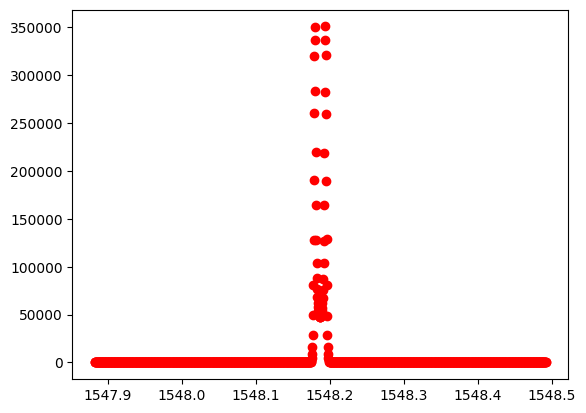

In [52]:
# plt.plot(lam_dat_13_12_0_118_1,K_int_13_12_0_118_1)
xx_K = lam_dat_13_12_0_118_1 * (11.8/cc_k) * C_IV_K_A + C_IV_K_A
plt.plot(xx_K,K_sct_13_15_0_118_1 ,'ro')
# plt.yscale('log')